## **Sentiment Analysis for Each Candidate Tweets**


In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('stopwords')

#from nltk.stem import PorterStemmer
import nltk.corpus
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import string

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('wordnet')

import nltk
nltk.download('omw-1.4')

from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.9 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df_Peter = pd.read_excel('PeterObi.xlsx', names=['hashtags', 'text','user', 'user_location','source_device', 'user_created_at','user_followers_count','user_following_count','user_verified','tweet_place','tweet_geo','tweet_created_at']) 
df_Peter

,hashtags,text,user,user_location,source_device,user_created_at,user_followers_count,user_following_count,user_verified,tweet_place,tweet_geo,tweet_created_at
0,['Nigerian'],"RT @emm44762744: Good Man, good heart_x000D_\n...",3plebim,Nigeria,"<a href=""http://twitter.com/download/android"" ...",Mon Aug 23 23:37:23 +0000 2010,10339.0,NaN,0.0,NaN,NaN,Sat Oct 22 21:45:23 +0000 2022
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],RT @Chinonso_Jesse1: When next they tell you P...,Deejay_Gavazaga,Dubai📍 »Dubai»America,"<a href=""http://twitter.com/download/iphone"" r...",Fri Jan 20 05:54:00 +0000 2012,852.0,NaN,0.0,NaN,NaN,Sat Oct 22 21:45:28 +0000 2022
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],RT @anita_tuduo: Peter Obi visit to Flood Vict...,nwekepikin,Right there with you,"<a href=""http://twitter.com/download/iphone"" r...",Tue Oct 08 06:33:05 +0000 2013,2533.0,NaN,0.0,NaN,NaN,Sat Oct 22 21:45:46 +0000 2022
...,...,...,...,...,...,...,...,...,...,...,...,...
536270,[],RT @DanBornoReal: Peter Obi loves the north mo...,HENRYMA61250933,NaN,"<a href=""http://twitter.com/download/android"" ...",Tue Nov 01 13:51:25 +0000 2022,135.0,NaN,0.0,NaN,NaN,Fri Nov 25 03:12:15 +0000 2022
536271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536272,[],RT @VictorIsrael_: The Northern Christians hav...,matthiannaji,"Federal Capital Territory, Nig","<a href=""http://twitter.com/download/android"" ...",Mon Dec 14 09:24:16 +0000 2009,1645.0,NaN,0.0,NaN,NaN,Fri Nov 25 03:12:15 +0000 2022
536273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_Atiku = pd.read_excel('AtikuAbubakar.xlsx', names=['hashtags', 'text','user', 'user_location','source_device', 'user_created_at','user_followers_count','user_following_count','user_verified','tweet_place','tweet_geo','tweet_created_at']) 
df_Atiku

,hashtags,text,user,user_location,source_device,user_created_at,user_followers_count,user_following_count,user_verified,tweet_place,tweet_geo,tweet_created_at
0,[],RT @Rasheethe: FLASH: The PPD Presidential Can...,Astambaya,"Gusau, Kaduna, Nigeria","<a href=""http://twitter.com/download/android"" ...",Mon Apr 01 19:12:52 +0000 2013,4427.0,NaN,0.0,NaN,NaN,Fri Nov 11 16:56:43 +0000 2022
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],"RT @Naija_PR: Atiku Abubakar, Bukola Saraki an...",AothmanL,"Gusau, Nigeria Lome","<a href=""http://twitter.com/download/iphone"" r...",Fri Apr 06 13:17:47 +0000 2012,489.0,NaN,0.0,NaN,NaN,Fri Nov 11 16:56:49 +0000 2022
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],RT @IAOkowa: Alongside our Presidential Candid...,am_BinHamzat,Nigeria,"<a href=""http://twitter.com/download/android"" ...",Wed Dec 04 13:30:27 +0000 2019,5813.0,NaN,0.0,NaN,NaN,Fri Nov 11 16:56:53 +0000 2022
...,...,...,...,...,...,...,...,...,...,...,...,...
444971,[],"RT @Amb_Balemoh: Yesterday, APC Governorship C...",NOlawuwo,"Lagos, Nigeria","<a href=""https://mobile.twitter.com"" rel=""nofo...",Tue Feb 16 09:14:55 +0000 2016,287.0,NaN,0.0,NaN,NaN,Mon Dec 19 11:05:25 +0000 2022
444972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444973,[],@atiku ðŸ˜‚ðŸ˜‚ðŸ˜‚ðŸ˜‚_x000D_\nBaba want coll...,KarlGodson,NaN,"<a href=""http://twitter.com/download/android"" ...",Sat Sep 17 02:22:03 +0000 2022,1.0,NaN,0.0,NaN,NaN,Mon Dec 19 11:05:34 +0000 2022
444974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_Tinubu = pd.read_excel('BolaTinubu.xlsx', names=['hashtags', 'text','user', 'user_location','source_device', 'user_created_at','user_followers_count','user_following_count','user_verified','tweet_place','tweet_geo','tweet_created_at']) 
df_Tinubu

,hashtags,text,user,user_location,source_device,user_created_at,user_followers_count,user_following_count,user_verified,tweet_place,tweet_geo,tweet_created_at
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],RT @Mr_JAGs: Dear Naanuans â€¦.. â€œReturn of ...,BigTsolaye,"Lagos, Nigeria","<a href=""http://twitter.com/download/android"" ...",Tue Nov 26 14:22:50 +0000 2019,327.0,NaN,0.0,NaN,NaN,Sun Nov 06 07:02:21 +0000 2022
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],RT @ARISEtv: Join us today at 7:30p.m for seri...,kennnet31979344,Nigeria,"<a href=""http://twitter.com/download/iphone"" r...",Fri Feb 15 10:03:58 +0000 2019,1479.0,NaN,0.0,NaN,NaN,Sun Nov 06 07:02:29 +0000 2022
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
414641,[],"RT @thecableng: â€˜Present Tinubu for debates,...",Concept_7318,"East, England","<a href=""http://twitter.com/download/android"" ...",Sat Jan 22 21:01:14 +0000 2022,30.0,NaN,0.0,NaN,NaN,Thu Dec 15 02:36:43 +0000 2022
414642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414643,[],@tundebucknor @mrlurvy Lagos blueprint wasnâ€™...,Ifedi_Gunner,Nigeria,"<a href=""http://twitter.com/download/iphone"" r...",Mon Feb 12 17:11:04 +0000 2018,472.0,NaN,0.0,NaN,NaN,Thu Dec 15 02:36:47 +0000 2022
414644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.concat([df_Atiku, df_Peter, df_Tinubu], names=['hashtags', 'text','user', 'user_location','source_device', 'user_created_at','user_followers_count','user_following_count','user_verified','tweet_place','tweet_geo','tweet_created_at'])

In [ ]:
df

,hashtags,text,user,user_location,source_device,user_created_at,user_followers_count,user_following_count,user_verified,tweet_place,tweet_geo,tweet_created_at,Date,Time,DateNew,usercreatedA,Date_new,usercreated,DateT_new,usercreatedT
0,[],RT @Rasheethe: FLASH: The PPD Presidential Can...,Astambaya,"Gusau, Kaduna, Nigeria",Andrioid,Mon Apr 01 19:12:52 +0000 2013,4427.0,NaN,0.0,NaN,NaN,Fri Nov 11 16:56:43 +0000 2022,NaT,16:56:43,2022-11-11,2013-01-01,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],"RT @Naija_PR: Atiku Abubakar, Bukola Saraki an...",AothmanL,"Gusau, Nigeria Lome",Iphone,Fri Apr 06 13:17:47 +0000 2012,489.0,NaN,0.0,NaN,NaN,Fri Nov 11 16:56:49 +0000 2022,NaT,16:56:49,2022-11-11,2012-06-01,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],RT @IAOkowa: Alongside our Presidential Candid...,am_BinHamzat,Nigeria,Andrioid,Wed Dec 04 13:30:27 +0000 2019,5813.0,NaN,0.0,NaN,NaN,Fri Nov 11 16:56:53 +0000 2022,NaT,16:56:53,2022-11-11,2019-04-01,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414641,[],"RT @thecableng: â€˜Present Tinubu for debates,...",Concept_7318,"East, England",Andrioid,Sat Jan 22 21:01:14 +0000 2022,30.0,NaN,0.0,NaN,NaN,Thu Dec 15 02:36:43 +0000 2022,NaT,02:36:43,NaN,NaN,NaN,NaN,2022-12-15,2022-01-22
414642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
414643,[],@tundebucknor @mrlurvy Lagos blueprint wasnâ€™...,Ifedi_Gunner,Nigeria,Iphone,Mon Feb 12 17:11:04 +0000 2018,472.0,NaN,0.0,NaN,NaN,Thu Dec 15 02:36:47 +0000 2022,NaT,02:36:47,NaN,NaN,NaN,NaN,2022-12-15,2018-02-12
414644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
PeterTweets = df_Peter['text'].dropna()

In [ ]:
AtikuTweets = df_Atiku['text'].dropna()

In [ ]:
TinubuTweets = df_Tinubu['text'].dropna()

In [ ]:
PeterTweets

0         RT @emm44762744: Good Man, good heart_x000D_\n...
2         RT @Chinonso_Jesse1: When next they tell you P...
4         RT @anita_tuduo: Peter Obi visit to Flood Vict...
6         RT @EbaseMatthew: Their President of Lagos won...
8         RT @Aminaruk: Do you know?_x000D_\n_x000D_\nCu...
                                ...                        
536266    RT @real_mercyeke: I had a dream peter OBI  wo...
536268    RT @nnabros: Mikano people won’t see this with...
536270    RT @DanBornoReal: Peter Obi loves the north mo...
536272    RT @VictorIsrael_: The Northern Christians hav...
536274    RT @Yahaya_IV: "In politics, it is about repre...
Name: text, Length: 268138, dtype: object

In [ ]:
AtikuTweets

0         RT @Rasheethe: FLASH: The PPD Presidential Can...
2         RT @Naija_PR: Atiku Abubakar, Bukola Saraki an...
4         RT @IAOkowa: Alongside our Presidential Candid...
6         RT @Naija_PR: Atiku Abubakar, Bukola Saraki an...
8         via @Naija_PR: Atiku Abubakar, Bukola Saraki a...
                                ...                        
444967    RT @bukolasaraki: @atiku Thank you, Your Excel...
444969    RT @Nobsdaslushhkid: The PDP is not even being...
444971    RT @Amb_Balemoh: Yesterday, APC Governorship C...
444973    @atiku ðŸ˜‚ðŸ˜‚ðŸ˜‚ðŸ˜‚_x000D_\nBaba want coll...
444975    RT @daishkawa: Osibanjo was an expert Buhari w...
Name: text, Length: 224505, dtype: object

In [ ]:
TinubuTweets

1         RT @Mr_JAGs: Dear Naanuans â€¦.. â€œReturn of ...
3         RT @ARISEtv: Join us today at 7:30p.m for seri...
5         RT @ChimarokeNamani: /3_x000D_\nwhich was esta...
7         RT @AjuriNgelale: Friends, this was an unusual...
9         RT @obnna: I am Igbo._x000D_\nI reside in Awka...
                                ...                        
414637    This is The Marina Blue Line train station tak...
414639    RT @DeeOneAyekooto: Tinubuâ€™s EKO ATLANTIC CI...
414641    RT @thecableng: â€˜Present Tinubu for debates,...
414643    @tundebucknor @mrlurvy Lagos blueprint wasnâ€™...
414645    RT @Tinubufrontier: FACT CHECK:_x000D_\nVERDIC...
Name: text, Length: 207324, dtype: object

In [ ]:
dfP_text = PeterTweets.to_frame
ghP = PeterTweets.to_frame()


In [ ]:
ghP

,text
0,"RT @emm44762744: Good Man, good heart_x000D_\n..."
2,RT @Chinonso_Jesse1: When next they tell you P...
4,RT @anita_tuduo: Peter Obi visit to Flood Vict...
6,RT @EbaseMatthew: Their President of Lagos won...
8,RT @Aminaruk: Do you know?_x000D_\n_x000D_\nCu...
...,...
536266,RT @real_mercyeke: I had a dream peter OBI wo...
536268,RT @nnabros: Mikano people won’t see this with...
536270,RT @DanBornoReal: Peter Obi loves the north mo...
536272,RT @VictorIsrael_: The Northern Christians hav...


In [ ]:
dfA_text = AtikuTweets.to_frame
ghA = AtikuTweets.to_frame()


In [ ]:
dfT_text = TinubuTweets.to_frame
ghT = TinubuTweets.to_frame()


In [ ]:
def clean_textA(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('rt', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'[ðŸâ€]', '', text)
    text = re.sub(r'[â€™â€¦]', '', text)
    text = re.sub('tâ', '', text)
    text = re.sub('x9d', '', text)
    text = re.sub('ÿ', '', text)
    text = re.sub('t ', '', text)
    text = re.sub(r'[â€™]', '', text)
    text = re.sub(r'[œðŸ]', '', text)
    text = re.sub(r'[ðŸ‘‡ðŸ‘‡ðŸ¤ŒðŸ“¢ðŸ•Šï]', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"@([a-zA-Z0-9_]{1,50})",'',str(text))

    return text
    

In [ ]:
def clean_textP(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('rt', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"@([a-zA-Z0-9_]{1,50})",'',str(text))
    return text
    

In [ ]:
def clean_textT(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('rt', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'[ðŸâ€]', '', text)
    text = re.sub(r'[â€™â€¦]', '', text)
    #text = re.sub('tâ', '', text)
    text = re.sub('x9d', '', text)
    text = re.sub('ÿ', '', text)
    #text = re.sub('t ', '', text)
    text = re.sub(r'[â€™]', '', text)
    text = re.sub(r'[œðŸ]', '', text)
    text = re.sub(r'[ðŸ‘‡ðŸ‘‡ðŸ¤ŒðŸ“¢ðŸ•Šï]', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"@([a-zA-Z0-9_]{1,50})",'',str(text))

    return text

In [ ]:
def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()

 
 

  # Tokens of Words
  Tokens = nltk.word_tokenize(Text)


  # Removing Stopwords and Lemmatizing Words
  # To reduce noises in our dataset, also to keep it simple and still 
  # powerful, we will only omit the word `not` from the list of stopwords

  

  for word in Tokens:
    if word not in stop_words:
      Processed_Text.append(Lemmatizer.lemmatize(word))

 

 

  return(" ".join(Processed_Text))

 

 

  return Text



In [ ]:

#applying function to data
ghP["text"]= ghP["text"].apply(lambda text: clean_textP(text))


In [ ]:
ghP["text"].head(15)

0       good man good  next president god is your st...
2       when next they tell you peter obi has no str...
4      anitatuduo peter obi visit to flood victims i...
6      ebasematthew their president of lagos wont ev...
8      aminaruk do you  tinubu apc borrows money fro...
10     ogunlpsuppo labour pay abeokuta south ward  m...
12     angelakutt happening now in delta state obiar...
14     jaypeegeneral god abeg🙏🏾 nigerians let’s not ...
16     ogunlpsuppo labour pay abeokuta south ward  m...
18     emekaezeanya peter obi is the standard of wha...
20     jaypeegeneral god abeg🙏🏾 nigerians let’s not ...
22      when next they tell you peter obi has no str...
24      good man good  next president god is your st...
26     jessehallidaygi this is a man that wants to s...
28                                  i love ❤️ this 🙏🏾👍🏾
Name: text, dtype: object

In [ ]:
#applying function to data
ghA["text"]= ghA["text"].apply(lambda text: clean_textA(text))


In [ ]:
#applying function to data
ghT["text"]= ghT["text"].apply(lambda text: clean_textT(text))

In [ ]:
ghP["text"]= ghP["text"].apply(lambda Text: Text_Processing(Text))

In [ ]:
ghP["text"]

0         good man good nexpresidengod strength watch aw...
2         nextell peter obi structure nohwesshow video f...
4         anitatuduo peter obi visiflood victim bayelsa ...
6         ebasematthew presidenlagos woneven win lagos c...
8         aminaruk tinubu apc borrows money cbn pay loan...
                                ...                        
536266    realmercyeke dream peter obi presidential elec...
536268     nnabros mikano people ’ see state bag talk 🤡 🤡 🤡
536270    danbornoreal peter obi love noh many highranki...
536272    victorisrael nohern christian long time endors...
536274    yahayaiv politics representation going church ...
Name: text, Length: 268138, dtype: object

In [ ]:
ghA["text"]= ghA["text"].apply(lambda Text: Text_Processing(Text))

In [ ]:
ghT["text"]= ghT["text"].apply(lambda Text: Text_Processing(Text))

In [ ]:
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score["compound"]


In [ ]:
ghP["polarity"]=ghP["text"].apply(sentiment_analyzer_scores)

In [ ]:
ghA["polarity"]=ghA["text"].apply(sentiment_analyzer_scores)

In [ ]:
ghT["polarity"]=ghT["text"].apply(sentiment_analyzer_scores)

In [ ]:
def sentiment_col(y):
    if y >= 0.05 :
        return 'positive'
    elif y > -0.05 <0.05 :
        return 'neutral'
    elif y <= 0.05:
        return 'negative'


In [ ]:
ghP["polarity"]=ghP["text"].apply(sentiment_analyzer_scores)

In [ ]:
ghP['polarity'] = ghP['polarity'].apply(sentiment_col)

In [ ]:
ghP['polarity']

0         positive
2         negative
4         negative
6         negative
8         negative
            ...   
536266    positive
536268     neutral
536270    positive
536272    positive
536274    positive
Name: polarity, Length: 268138, dtype: object

In [ ]:
polp=ghP['polarity'].groupby(ghP['polarity']).size().reset_index(name='count')

polp.head(15)
polp=polp.iloc[:60,::]
polp

,polarity,count
0,negative,67590
1,neutral,79548
2,positive,121000


In [ ]:
polarityP=polp['polarity']
TotalPol=polp['count']
explode=[0.1,0.1,0.1]
colors = ['lightcoral', 'lightblue', 'lightgreen']

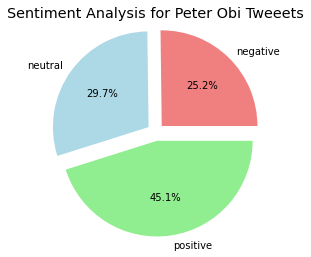

In [ ]:
plt.pie(TotalPol, labels = polarityP, radius=1.1, colors=colors, autopct='%2.1f%%', explode=explode)
plt.title('Sentiment Analysis for Peter Obi Tweeets')
#plt.legend(labels)
plt.show()


In [ ]:
ghA['polarity'] = ghA['polarity'].apply(sentiment_col)

In [ ]:
ghA['polarity']

0          neutral
2          neutral
4          neutral
6          neutral
8          neutral
            ...   
444967    positive
444969    positive
444971     neutral
444973    positive
444975    positive
Name: polarity, Length: 224505, dtype: object

In [ ]:
polA=ghA['polarity'].groupby(ghA['polarity']).size().reset_index(name='count')

polA.head(15)
polA=polA.iloc[:60,::]
polA

,polarity,count
0,negative,61914
1,neutral,74245
2,positive,88346


In [ ]:
polarityA=polA['polarity']
TotalPolA=polA['count']
explode=[0.1,0.1,0.1]
colors = ['lightcoral', 'lightblue', 'lightgreen']

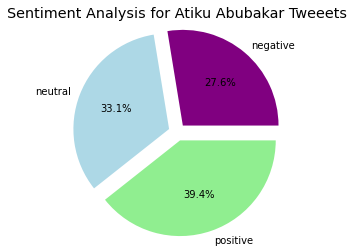

In [ ]:
plt.pie(TotalPolA, labels = polarityA, radius=1.1, colors=colorsA, autopct='%2.1f%%', explode=explode)
plt.title('Sentiment Analysis for Atiku Abubakar Tweeets')
#plt.legend(labels)
plt.show()


In [ ]:
ghT['polarity'] = ghT['polarity'].apply(sentiment_col)

In [ ]:
polT=ghT['polarity'].groupby(ghT['polarity']).size().reset_index(name='count')

polT.head(15)
polT=polT.iloc[:60,::]
polT

,polarity,count
0,negative,55868
1,neutral,88659
2,positive,62797


In [ ]:
polarityT=polT['polarity']
TotalPolT=polT['count']
explode=[0.1,0.1,0.1]
colorsT = ['yellow', 'lightblue', 'lightgreen']

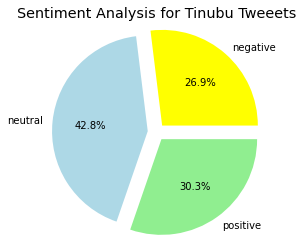

In [ ]:
plt.pie(TotalPolT, labels = polarityT, radius=1.1, colors=colorsT, autopct='%2.1f%%', explode=explode)
plt.title('Sentiment Analysis for Tinubu Tweeets')
#plt.legend(labels)
plt.show()

In [ ]:

import seaborn as sns
from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt
import random
#dl_df = df.copy()
dfPeter = ghP.groupby('polarity').size().reset_index(name='coun')
n = dfPeter['polarity'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(1000)
c = random.choices(all_colors)


Text(0.5, 1.0, 'Sentiment Analysis for Peter Obi Tweets')

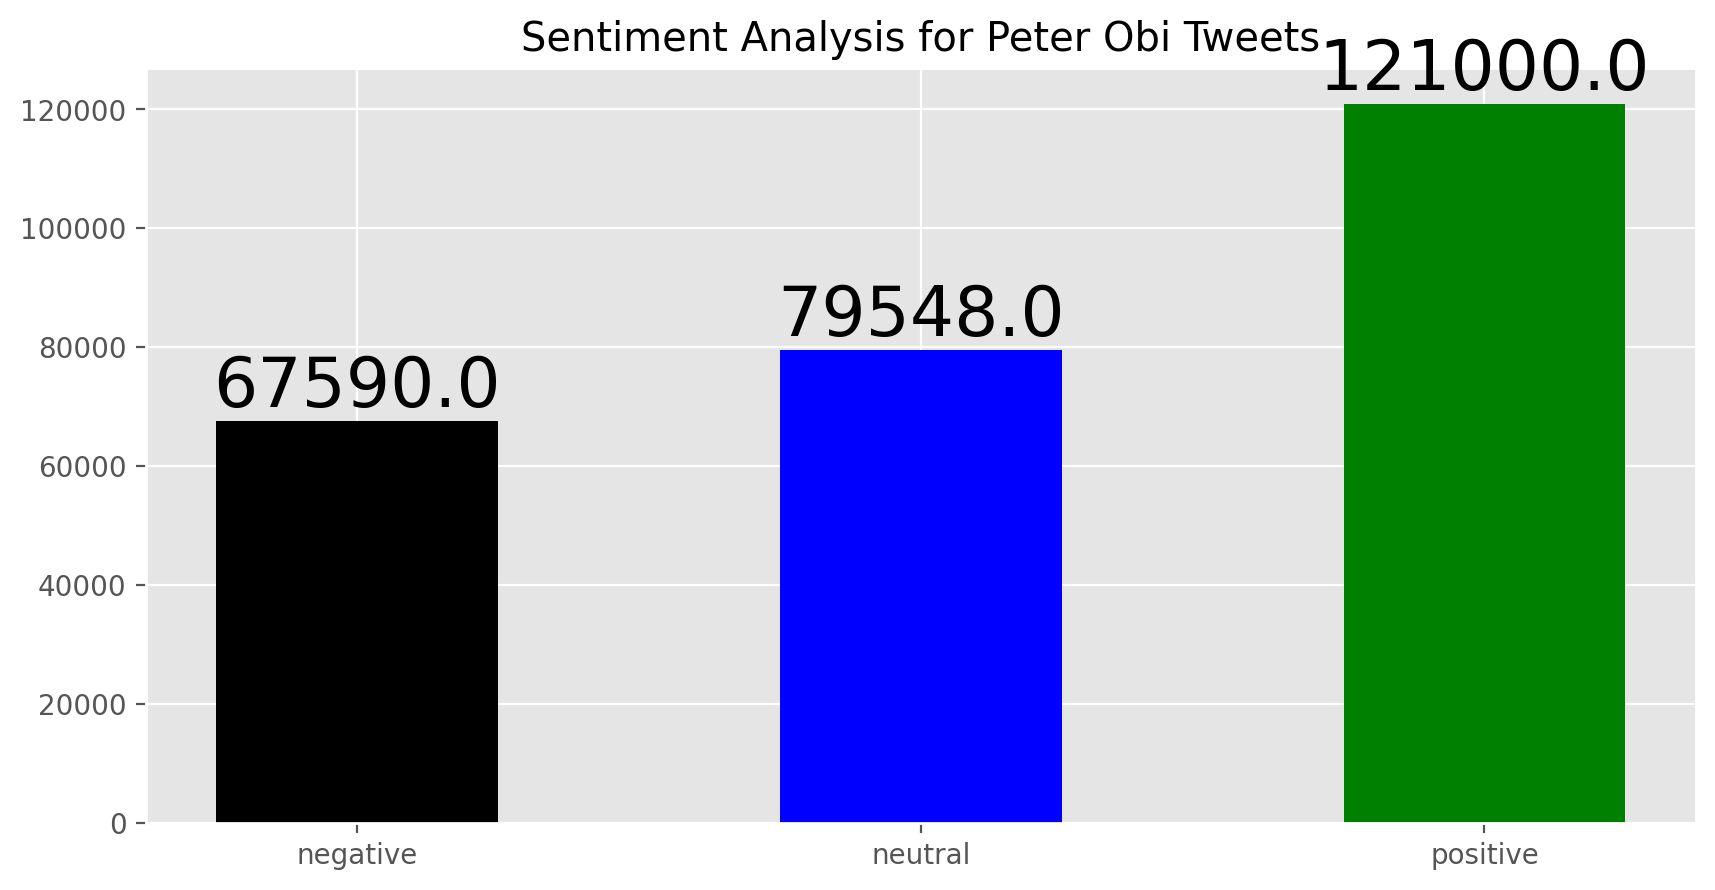

In [ ]:
# Plot Bars
plt.figure(figsize=(10,5), dpi= 200)
plt.bar(dfPeter['polarity'], dfPeter['coun'], color=['black', 'blue', 'green'], width=.5)
for i, val in enumerate(dfPeter['coun'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':25}) 

plt.title('Sentiment Analysis for Peter Obi Tweets')

Text(0.5, 1.0, 'Sentiment Analysis for Peter Obi Tweets')

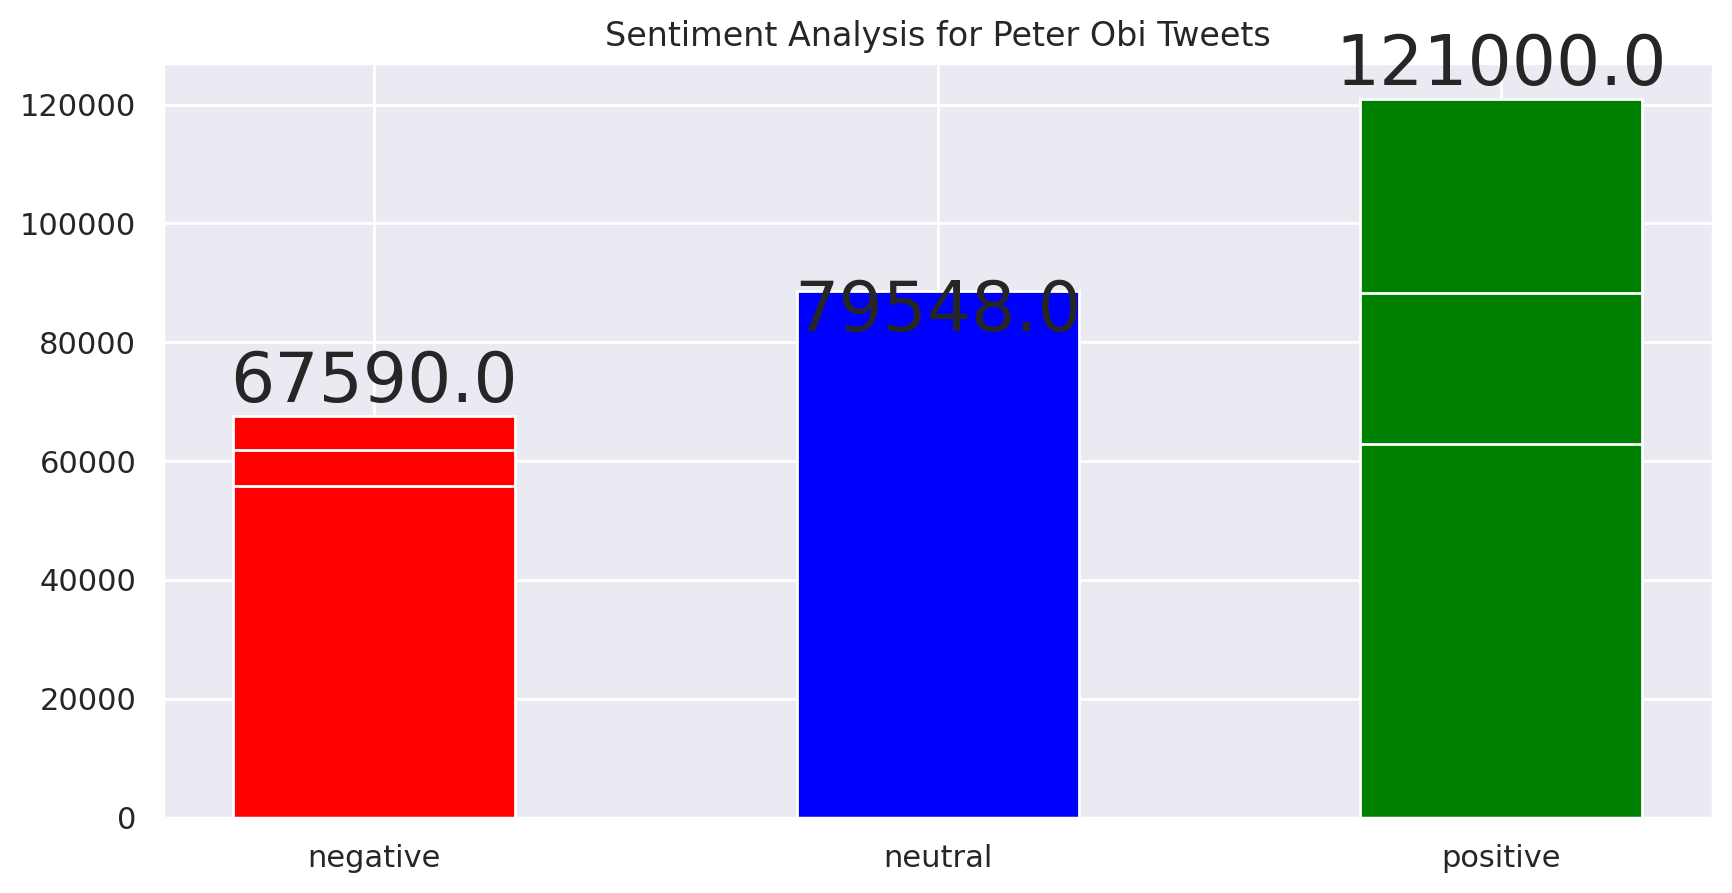

In [ ]:
# Plot Bars
plt.figure(figsize=(10,5), dpi= 200)
plt.bar(dfPeter['polarity'], dfPeter['coun'], color=['red', 'blue', 'green'], width=.5)
plt.bar(dfAtiku['polarity'], dfAtiku['coun'], color=['red', 'blue', 'green'], width=.5)
plt.bar(dfTinubu['polarity'], dfTinubu['coun'], color=['red', 'blue', 'green'], width=.5)

for i, val in enumerate(dfPeter['coun'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':25}) 
plt.xticks(r + width/2,['positive','negative','neutral'])
plt.legend()
plt.title('Sentiment Analysis for Peter Obi Tweets')

Plot Vader Sentiment for Atiku

In [ ]:
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt
import random
#dl_df = df.copy()
dfAtiku = ghA.groupby('polarity').size().reset_index(name='coun')
n = dfAtiku['polarity'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(1000)
c = random.choices(all_colors)


Text(0.5, 1.0, 'Sentiment Analysis for Atiku Tweets')

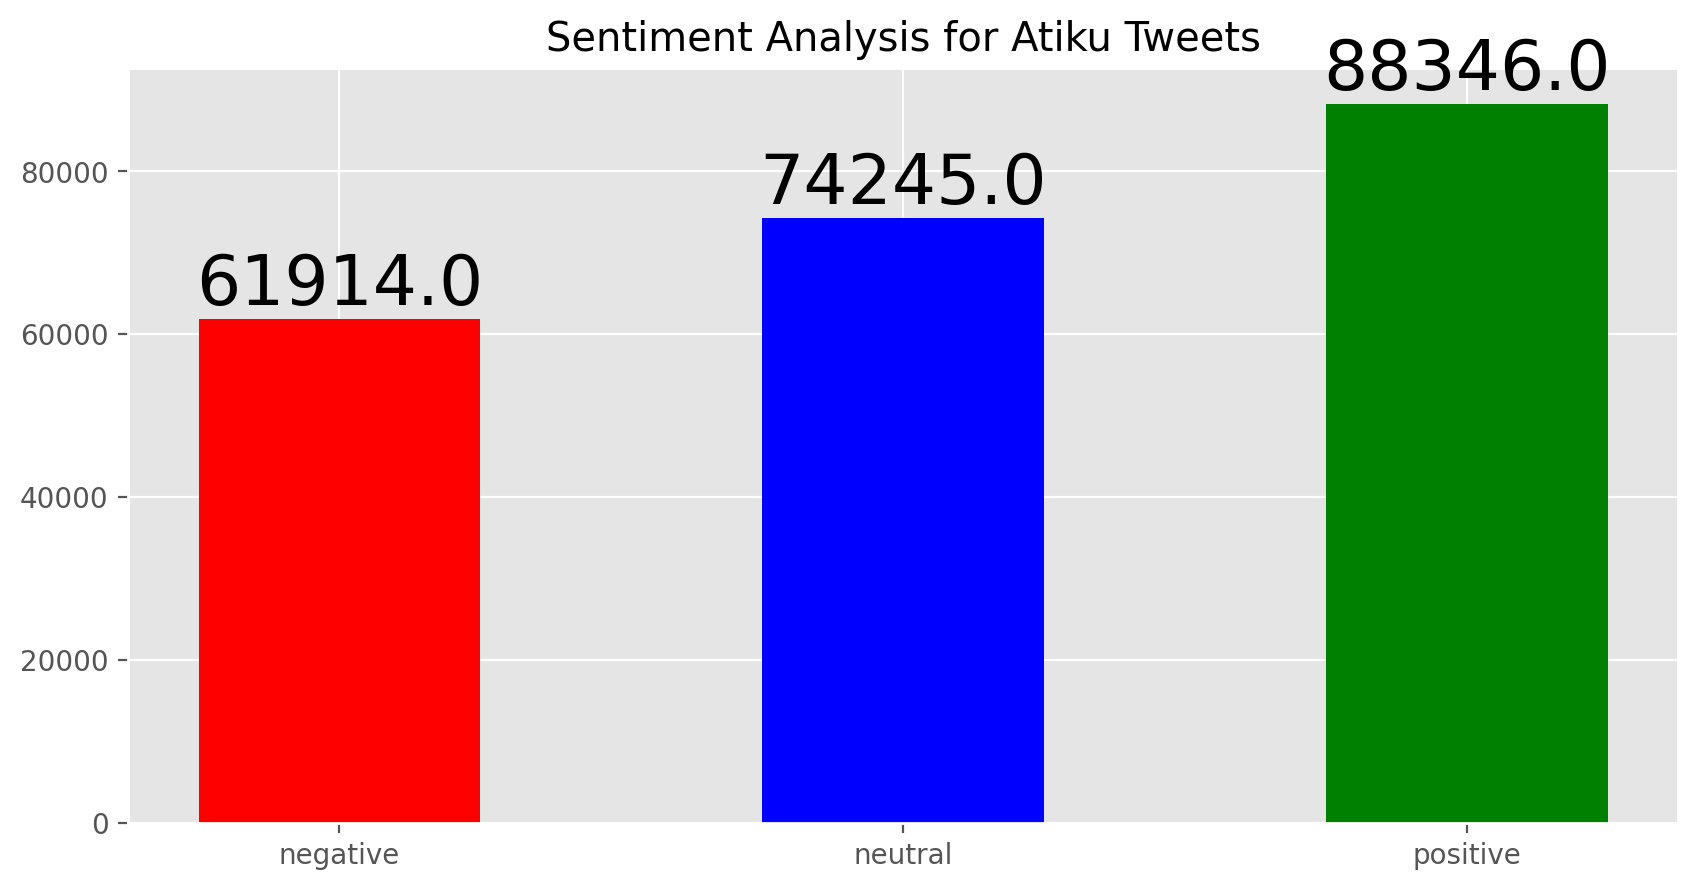

In [ ]:
# Plot Bars
plt.figure(figsize=(10,5), dpi= 200)
plt.bar(dfAtiku['polarity'], dfAtiku['coun'], color=['red', 'blue', 'green'], width=.5)
for i, val in enumerate(dfAtiku['coun'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':25}) 

plt.title('Sentiment Analysis for Atiku Tweets')

Text(0.5, 1.0, 'Sentiment Analysis for Atiku Tweets')

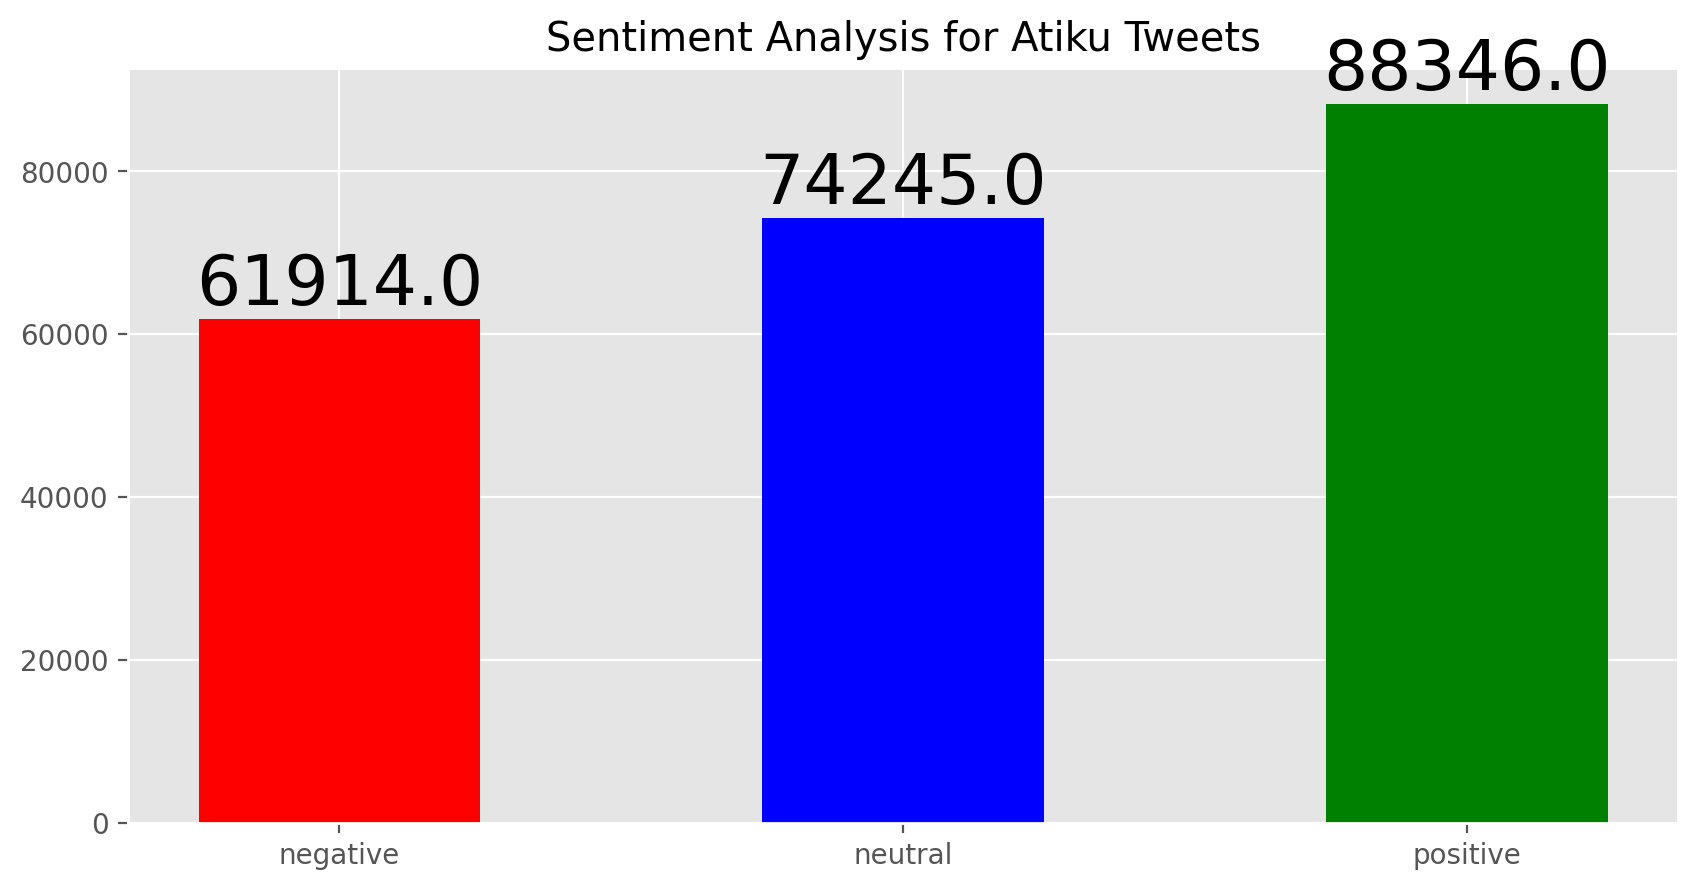

In [ ]:
# Plot Bars
plt.figure(figsize=(10,5), dpi= 200)
plt.bar(dfAtiku['polarity'], dfAtiku['coun'], color=['red', 'blue', 'green'], width=.5)
for i, val in enumerate(dfAtiku['coun'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':25}) 

plt.title('Sentiment Analysis for Atiku Tweets')

Plot Vader Sentiment for Tinubu Tweets

In [ ]:
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt
import random
dfTinubu = ghT.groupby('polarity').size().reset_index(name='coun')
n = dfTinubu['polarity'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(1000)
c = random.choices(all_colors)


Text(0.5, 1.0, 'Sentiment Analysis for Tinubu Tweets')

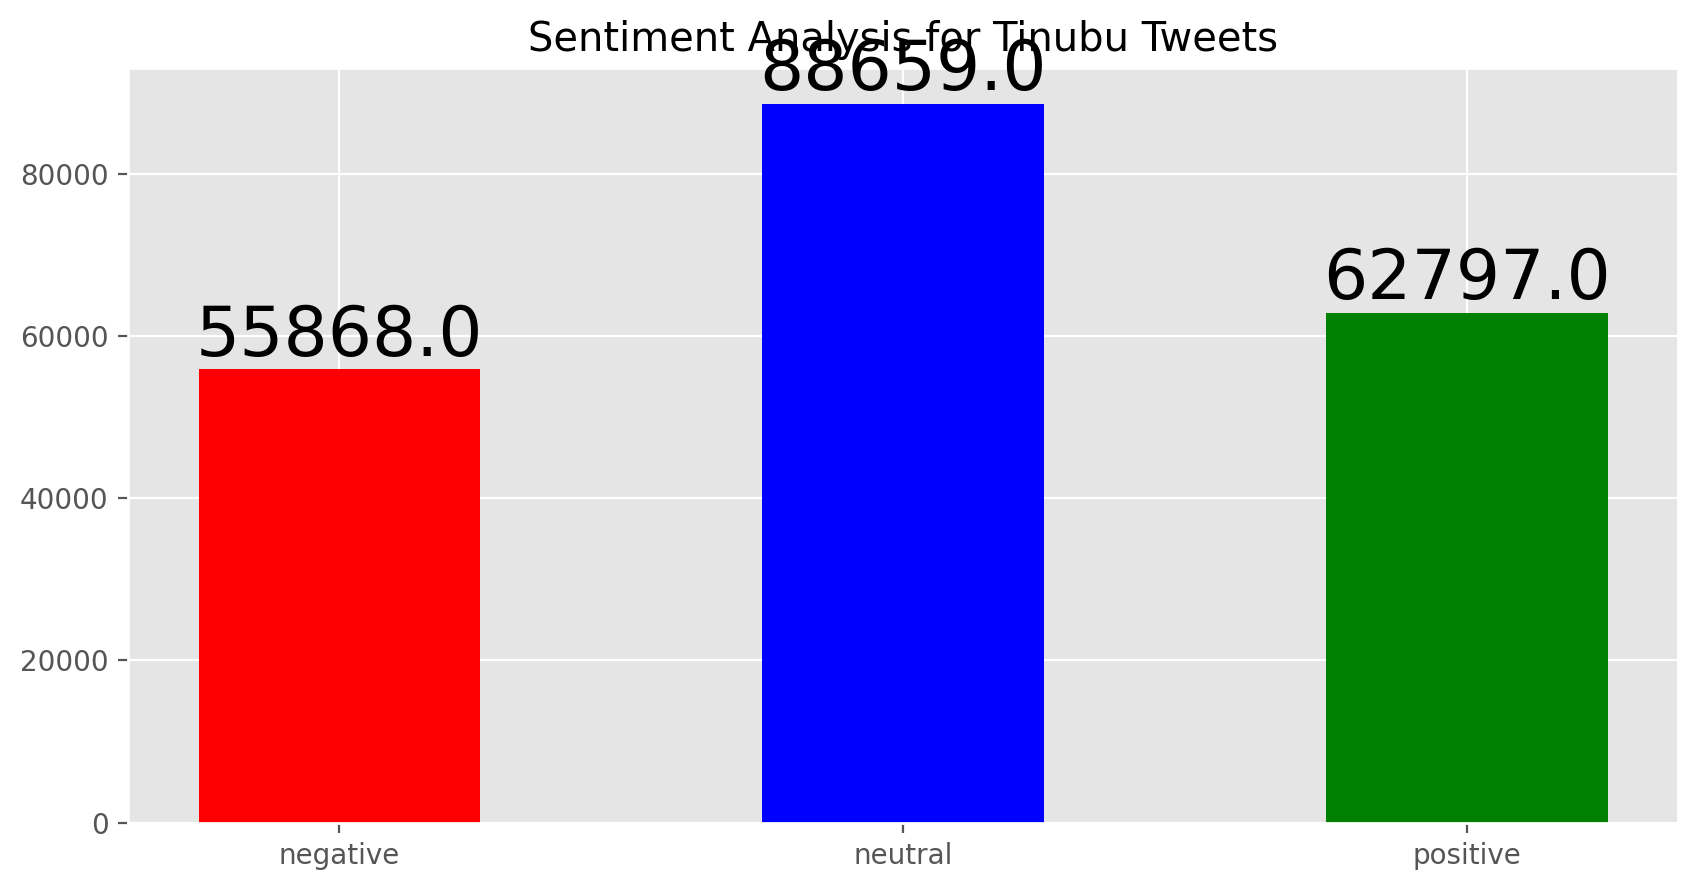

In [ ]:
# Plot Bars
plt.figure(figsize=(10,5), dpi= 200)
plt.bar(dfTinubu['polarity'], dfTinubu['coun'], color=['red', 'blue', 'green'], width=.5)
for i, val in enumerate(dfTinubu['coun'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':25}) 

plt.title('Sentiment Analysis for Tinubu Tweets')

Text(0.5, 1.0, 'Sentiment Analysis for Tinubu Tweets')

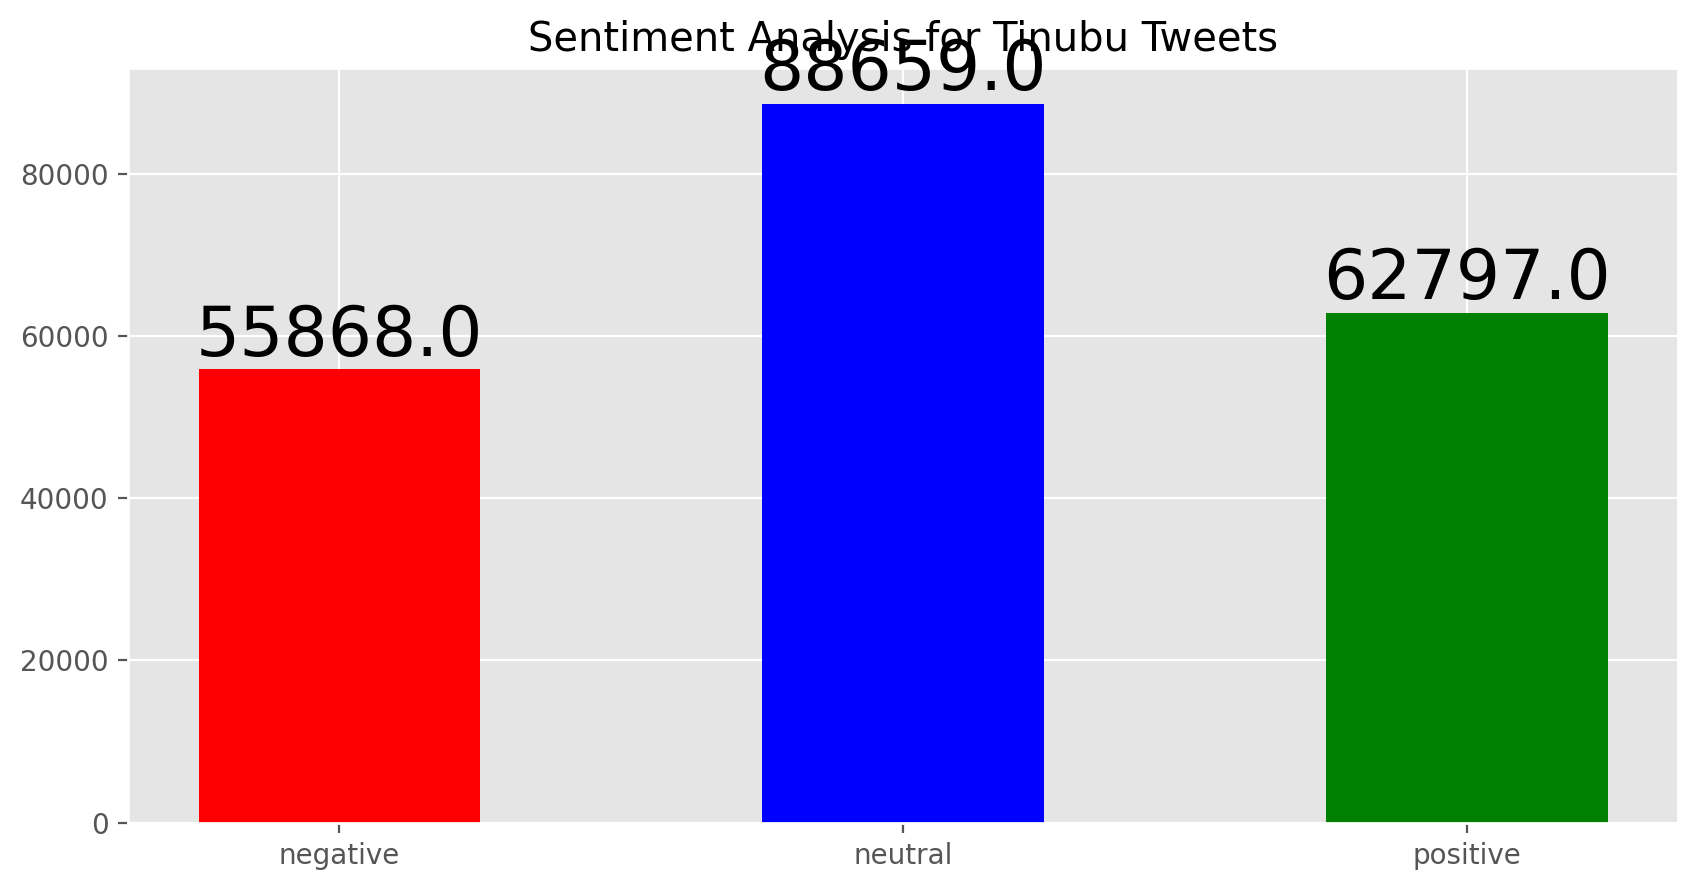

In [ ]:
# Plot Bars
plt.figure(figsize=(10,5), dpi= 200)
plt.bar(dfTinubu['polarity'], dfTinubu['coun'], color=['red', 'blue', 'green'], width=.5)
for i, val in enumerate(dfTinubu['coun'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':25}) 

plt.title('Sentiment Analysis for Tinubu Tweets')

Plots of Sentiments of individual candidates

In [ ]:
import pandas as pd
import matplotlib.pyplot as plot
# Create DataFrame
dfsentiment = pd.DataFrame({"Atiku Abubakar":[27.6,33.1,39.4],
                   "Peter Obi":[25.2, 29.7, 45.1],
                   "Bola Tinubu":[26.9, 42.8, 30.3]},
                  index = ["Negative", "Neutral", "Positive"])

In [ ]:
# Create unstacked multiple columns bar
dfsentiment.plot(kind="bar", figsize = (8, 4), color=['red', 'green', 'blue'],  title="Sentiment Analysis of Individual Candidate Data")

#**CREATING WORD CLOUD FOR PETER OBI TWEETS**

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open("/content/cloud.jpg"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="black",
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(ghP["text"].values)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(ghP["text"].values)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(ghA["text"].values)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(ghT["text"].values)



Output hidden; open in https://colab.research.google.com to view.

#**EXPLORATORY ANALYSIS FOR INDIVIDUAL CANDIDATE TWEETS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
import collections
import random




#TIMESERIES FOR CANDIDATE TWEETS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


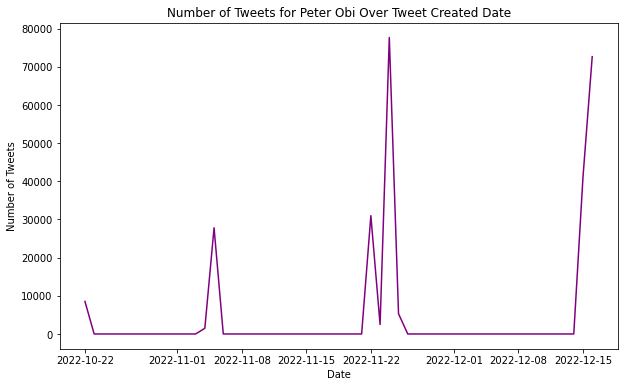

In [ ]:
#PLOT NUMBER OF TWEET AGAINST TWEET CREATED DATE


timestamp = df_Peter['tweet_created_at'].dropna()
df_Peter['tweet_created_at'] = pd.to_datetime(df_Peter['tweet_created_at'])

 
# Group the data by month and count the number of tweets
tweet_count = df_Peter.groupby(pd.Grouper(key='tweet_created_at', freq='D')).count()
plt.rcParams["figure.figsize"] = (10,6)
# Plot the number of tweets over Date Created
color = 'purple'
plt.plot(tweet_count.index, tweet_count['text'],color=color )
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets for Peter Obi Over Tweet Created Date")
plt.show()




In [ ]:
timeseriesP = df_Peter['tweet_created_at'].dropna()

In [ ]:
timeseriesP

0         Sat Oct 22 21:45:23 +0000 2022
2         Sat Oct 22 21:45:28 +0000 2022
4         Sat Oct 22 21:45:46 +0000 2022
6         Sat Oct 22 21:46:37 +0000 2022
8         Sat Oct 22 21:46:45 +0000 2022
                       ...              
536266    Fri Nov 25 03:12:11 +0000 2022
536268    Fri Nov 25 03:12:12 +0000 2022
536270    Fri Nov 25 03:12:15 +0000 2022
536272    Fri Nov 25 03:12:15 +0000 2022
536274    Fri Nov 25 03:12:19 +0000 2022
Name: tweet_created_at, Length: 268138, dtype: object

In [ ]:
df_Peter['Date_new'] = pd.to_datetime(timeseriesP).dt.date
df_Peter['Time'] = pd.to_datetime(timeseriesP).dt.time
df_Peter.head(5)

,hashtags,text,user,user_location,source_device,user_created_at,user_followers_count,user_following_count,user_verified,tweet_place,tweet_geo,tweet_created_at,Date_new,Time
0,['Nigerian'],"RT @emm44762744: Good Man, good heart_x000D_\n...",3plebim,Nigeria,"<a href=""http://twitter.com/download/android"" ...",Mon Aug 23 23:37:23 +0000 2010,10339.0,NaN,0.0,NaN,NaN,Sat Oct 22 21:45:23 +0000 2022,2022-10-22,21:45:23
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],RT @Chinonso_Jesse1: When next they tell you P...,Deejay_Gavazaga,Dubai📍 »Dubai»America,"<a href=""http://twitter.com/download/iphone"" r...",Fri Jan 20 05:54:00 +0000 2012,852.0,NaN,0.0,NaN,NaN,Sat Oct 22 21:45:28 +0000 2022,2022-10-22,21:45:28
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],RT @anita_tuduo: Peter Obi visit to Flood Vict...,nwekepikin,Right there with you,"<a href=""http://twitter.com/download/iphone"" r...",Tue Oct 08 06:33:05 +0000 2013,2533.0,NaN,0.0,NaN,NaN,Sat Oct 22 21:45:46 +0000 2022,2022-10-22,21:45:46


In [ ]:
nf=df_Peter.groupby('Date_new').size().reset_index(name='tweet_volume')
nf.head(15)
nf=nf.iloc[:60,::]
nf


,Date_new,tweet_volume
0,2022-10-22,8530
1,2022-11-04,1496
2,2022-11-05,27830
3,2022-11-22,31003
4,2022-11-23,2481
5,2022-11-24,77705
6,2022-11-25,5305
7,2022-12-15,41112
8,2022-12-16,72676


Plot Time Series for Peter Obi (Tweet Dates)

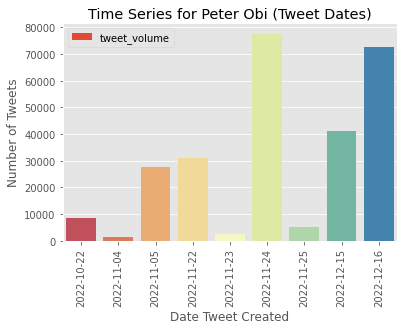

In [ ]:
nf.plot.bar(x='Date_new', y="tweet_volume", rot=90, title="Time Series for Peter Obi (Tweet Dates)")


#Using Seaborn
axp=sns.barplot(x='Date_new', y='tweet_volume', data=nf, palette='Spectral')

plt.xlabel('Date Tweet Created')
plt.ylabel('Number of Tweets')
plt.show(block=True)

Plot Time Series for Atiku (Tweet Dates)

In [ ]:
#PLOT NUMBER OF TWEET AGAINST TWEET CREATED DATE


timestampA = df_Atiku['tweet_created_at'].dropna()
df_Peter['tweet_created_at'] = pd.to_datetime(df_Peter['tweet_created_at'],errors='coerce')

 
# Group the data by month and count the number of tweets
tweet_count = df_Atiku.groupby(pd.Grouper(key='tweet_created_at', freq='D')).count()
plt.rcParams["figure.figsize"] = (10,6)
# Plot the number of tweets over Date Created
color = 'blue'
plt.plot(tweet_count.index, tweet_count['text'],color=color )
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets for Atiku Abubakar Over Tweet Created Date")
plt.show()


TypeError: ignored

In [ ]:
timeseriesA = df_Atiku['tweet_created_at'].dropna()
df_Atiku['DateNew'] = pd.to_datetime(timeseriesA, errors='coerce').dt.date
df_Atiku['Time'] = pd.to_datetime(timeseriesA, errors='coerce').dt.time
df_Atiku.head(5)


,hashtags,text,user,user_location,source_device,user_created_at,user_followers_count,user_following_count,user_verified,tweet_place,tweet_geo,tweet_created_at,Date,Time,DateNew
0,[],RT @Rasheethe: FLASH: The PPD Presidential Can...,Astambaya,"Gusau, Kaduna, Nigeria","<a href=""http://twitter.com/download/android"" ...",Mon Apr 01 19:12:52 +0000 2013,4427.0,NaN,0.0,NaN,NaN,Fri Nov 11 16:56:43 +0000 2022,NaT,16:56:43,2022-11-11
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,[],"RT @Naija_PR: Atiku Abubakar, Bukola Saraki an...",AothmanL,"Gusau, Nigeria Lome","<a href=""http://twitter.com/download/iphone"" r...",Fri Apr 06 13:17:47 +0000 2012,489.0,NaN,0.0,NaN,NaN,Fri Nov 11 16:56:49 +0000 2022,NaT,16:56:49,2022-11-11
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,[],RT @IAOkowa: Alongside our Presidential Candid...,am_BinHamzat,Nigeria,"<a href=""http://twitter.com/download/android"" ...",Wed Dec 04 13:30:27 +0000 2019,5813.0,NaN,0.0,NaN,NaN,Fri Nov 11 16:56:53 +0000 2022,NaT,16:56:53,2022-11-11


In [ ]:
nA=df_Atiku.groupby('DateNew').size().reset_index(name='tweet_counts')
nA.head(15)
nA=nA.iloc[:60,::]
nA

,DateNew,tweet_counts
0,2022-11-03,3
1,2022-11-05,305
2,2022-11-07,1962
3,2022-11-09,5273
4,2022-11-11,2800
5,2022-11-12,1197
6,2022-11-13,232
7,2022-11-23,2302
8,2022-12-05,3546
9,2022-12-06,7146


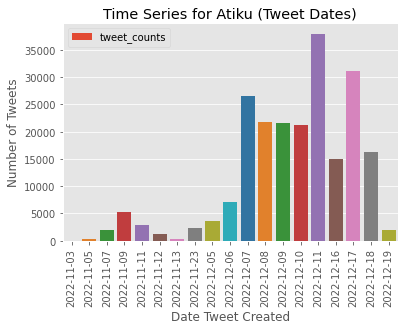

In [ ]:
nA.plot.bar(x='DateNew', y="tweet_counts", rot=90, title="Time Series for Atiku (Tweet Dates)")


#Using Seaborn
axA=sns.barplot(x='DateNew', y='tweet_counts', data=nA, palette='tab10')

plt.xlabel('Date Tweet Created')
plt.ylabel('Number of Tweets')
plt.show(block=True)

Plot Time Series for Tinubu (Tweet Dates)

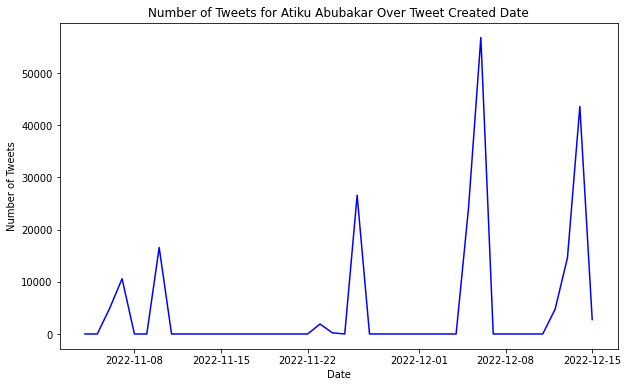

In [ ]:
#PLOT NUMBER OF TWEET AGAINST TWEET CREATED DATE


timestampT = df_Tinubu['tweet_created_at'].dropna()
df_Tinubu['tweet_created_at'] = pd.to_datetime(df_Tinubu['tweet_created_at'])

 
# Group the data by month and count the number of tweets
tweet_count = df_Tinubu.groupby(pd.Grouper(key='tweet_created_at', freq='D')).count()
plt.rcParams["figure.figsize"] = (10,6)
# Plot the number of tweets over Date Created
color = 'blue'
plt.plot(tweet_count.index, tweet_count['text'],color=color )
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets for Atiku Abubakar Over Tweet Created Date")
plt.show()

In [ ]:
timeseriesT = df_Tinubu['tweet_created_at'].dropna()

In [ ]:
df_Tinubu['DateT_new'] = pd.to_datetime(timeseriesT).dt.date
df_Tinubu['Time'] = pd.to_datetime(timeseriesT).dt.time
df_Tinubu.head(5)

,hashtags,text,user,user_location,source_device,user_created_at,user_followers_count,user_following_count,user_verified,tweet_place,tweet_geo,tweet_created_at,DateT_new,Time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],RT @Mr_JAGs: Dear Naanuans â€¦.. â€œReturn of ...,BigTsolaye,"Lagos, Nigeria","<a href=""http://twitter.com/download/android"" ...",Tue Nov 26 14:22:50 +0000 2019,327.0,NaN,0.0,NaN,NaN,Sun Nov 06 07:02:21 +0000 2022,2022-11-06,07:02:21
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],RT @ARISEtv: Join us today at 7:30p.m for seri...,kennnet31979344,Nigeria,"<a href=""http://twitter.com/download/iphone"" r...",Fri Feb 15 10:03:58 +0000 2019,1479.0,NaN,0.0,NaN,NaN,Sun Nov 06 07:02:29 +0000 2022,2022-11-06,07:02:29
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nT=df_Tinubu.groupby('DateT_new').size().reset_index(name='tweet_count')

nT.head(15)
nT=nT.iloc[:60,::]
nT


,DateT_new,tweet_count
0,2022-11-04,4
1,2022-11-06,4922
2,2022-11-07,10582
3,2022-11-10,16570
4,2022-11-23,1907
5,2022-11-24,219
6,2022-11-26,26573
7,2022-12-05,24054
8,2022-12-06,56811
9,2022-12-12,4726


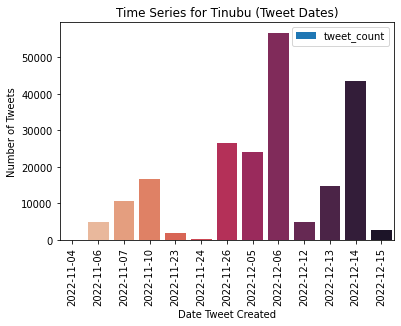

In [ ]:
nT.plot.bar(x='DateT_new', y="tweet_count", rot=90, title="Time Series for Tinubu (Tweet Dates)")


#Using Seaborn
axT=sns.barplot(x='DateT_new', y='tweet_count', data=nT, palette='rocket_r')

plt.xlabel('Date Tweet Created')
plt.ylabel('Number of Tweets')
plt.show(block=True)

Time Series for Peter Obi (Tweet Time)

In [ ]:
tmP=df_Peter.groupby('Time').size().reset_index(name='tweet_volume')

tmP.head(15)
tmP=tmP.iloc[:60,::]
tmP


,Time,tweet_volume
0,00:00:00,7
1,00:00:01,2
2,00:00:03,2
3,00:00:04,1
4,00:00:05,4
5,00:00:06,2
6,00:00:07,3
7,00:00:08,1
8,00:00:09,2
9,00:00:10,3


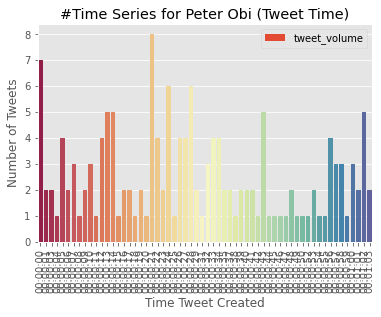

In [ ]:
tmP.plot.bar(x='Time', y="tweet_volume", rot=90, title="#Time Series for Peter Obi (Tweet Time)")


#Using Seaborn
axS=sns.barplot(x='Time', y='tweet_volume', data=tmP, palette='Spectral')

plt.xlabel('Time Tweet Created')
plt.ylabel('Number of Tweets')
plt.show(block=True)

Time Series for Atiku (Tweet Time)

In [ ]:
tmA=df_Atiku.groupby('Time').size().reset_index(name='tweet_volume')

tmA.head(15)
tmA=tmA.iloc[:60,::]
tmA


,Time,tweet_volume
0,00:00:01,2
1,00:00:04,1
2,00:00:05,2
3,00:00:06,1
4,00:00:08,3
5,00:00:10,2
6,00:00:11,2
7,00:00:13,1
8,00:00:17,1
9,00:00:18,3


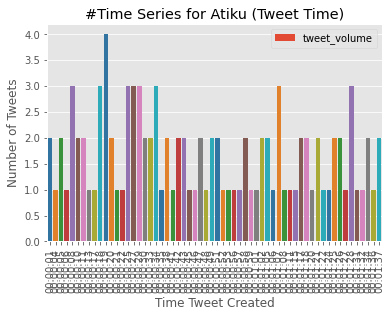

In [ ]:
tmA.plot.bar(x='Time', y="tweet_volume", rot=90, title="#Time Series for Atiku (Tweet Time)")


#Using Seaborn
axX=sns.barplot(x='Time', y='tweet_volume', data=tmA, palette='tab10')

plt.xlabel('Time Tweet Created')
plt.ylabel('Number of Tweets')
plt.show(block=True)

Time Series for Tinubu (Tweet Time)

In [ ]:
tmT=df_Tinubu.groupby('Time').size().reset_index(name='tweet_volume')

tmT.head(15)
tmT=tmT.iloc[:60,::]
tmT


,Time,tweet_volume
0,00:00:00,3
1,00:00:01,5
2,00:00:02,2
3,00:00:03,4
4,00:00:04,2
5,00:00:05,5
6,00:00:06,2
7,00:00:07,2
8,00:00:08,2
9,00:00:09,3


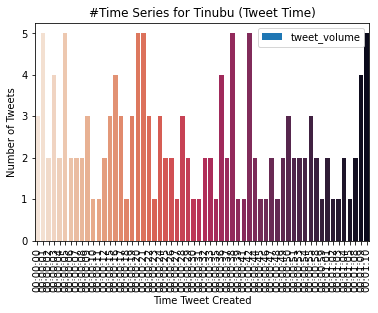

In [ ]:
tmT.plot.bar(x='Time', y="tweet_volume", rot=90, title="#Time Series for Tinubu (Tweet Time)")


#Using Seaborn
axB=sns.barplot(x='Time', y='tweet_volume', data=tmT, palette='rocket_r')

plt.xlabel('Time Tweet Created')
plt.ylabel('Number of Tweets')
plt.show(block=True)

USER CREATED DATES FOR PETER OBI TWEETS

In [ ]:
#PLOT NUMBER OF TWEET AGAINST USER CREATED DATE
usercreated = df_Peter['user_created_at'].dropna()

In [ ]:
usercreated

0         Mon Aug 23 23:37:23 +0000 2010
2         Fri Jan 20 05:54:00 +0000 2012
4         Tue Oct 08 06:33:05 +0000 2013
6         Wed Feb 07 07:28:08 +0000 2018
8         Thu Nov 21 19:00:20 +0000 2013
                       ...              
536266    Fri Feb 01 12:05:27 +0000 2013
536268    Sun Nov 14 18:45:11 +0000 2010
536270    Tue Nov 01 13:51:25 +0000 2022
536272    Mon Dec 14 09:24:16 +0000 2009
536274    Thu Oct 10 02:28:28 +0000 2013
Name: user_created_at, Length: 268138, dtype: object

In [ ]:
df_Peter['usercreated'] = pd.to_datetime(df_Peter['user_created_at']).dt.date

user=df_Peter.groupby('usercreated').size().reset_index(name='tweet_volume')

user.head(15)
user=user.iloc[:60,::]
user

,usercreated,tweet_volume
0,2007-07-04,1
1,2007-08-07,2
2,2007-11-04,50
3,2008-02-07,2
4,2008-04-19,3
5,2008-05-12,1
6,2008-05-20,1
7,2008-05-21,1
8,2008-05-24,11
9,2008-05-30,11


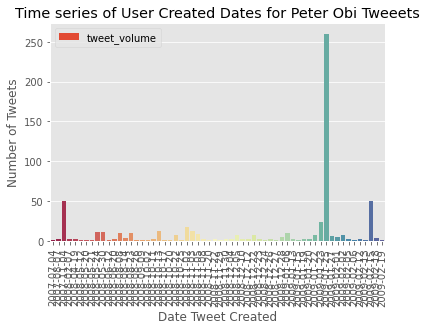

In [ ]:
user.plot.bar(x='usercreated', y="tweet_volume", rot=90, title="Time series of User Created Dates for Peter Obi Tweeets")


#Using Seaborn
axUP=sns.barplot(x='usercreated', y='tweet_volume', data=user, palette='Spectral')

plt.xlabel('Date Tweet Created')
plt.ylabel('Number of Tweets')
plt.show(block=True)

USER CREATED DATES FOR ATIKU TWEETS

In [ ]:
#PLOT NUMBER OF TWEET AGAINST USER CREATED DATE
usercreatedA = df_Atiku['user_created_at'].dropna()

In [ ]:
usercreatedA

0         Mon Apr 01 19:12:52 +0000 2013
2         Fri Apr 06 13:17:47 +0000 2012
4         Wed Dec 04 13:30:27 +0000 2019
6         Wed Jan 26 16:46:29 +0000 2011
8         Sun Aug 27 18:47:01 +0000 2017
                       ...              
444967    Wed Mar 28 17:33:06 +0000 2018
444969    Tue May 31 16:57:43 +0000 2011
444971    Tue Feb 16 09:14:55 +0000 2016
444973    Sat Sep 17 02:22:03 +0000 2022
444975    Thu Jan 14 07:22:19 +0000 2016
Name: user_created_at, Length: 221160, dtype: object

In [ ]:
from datetime import datetime

In [ ]:
df_Atiku['usercreatedA'] = pd.to_datetime(usercreatedA, format='%a %b %m %H:%M:%S %z %Y' ,  errors='coerce').dt.date




In [ ]:
df_Atiku['usercreatedA']

0         2013-01-01
1                NaN
2         2012-06-01
3                NaN
4         2019-04-01
             ...    
444971           NaT
444972           NaN
444973           NaT
444974           NaN
444975           NaT
Name: usercreatedA, Length: 444976, dtype: object

In [ ]:
userA=df_Atiku.groupby('usercreatedA').size().reset_index(name='tweet_volume')

userA.head(15)
userA=userA.iloc[:60,::]
userA


,usercreatedA,tweet_volume
0,2007-04-01,31
1,2008-02-01,11
2,2008-03-01,12
3,2008-04-01,2
4,2008-05-01,9
5,2008-06-01,1
6,2008-07-01,1
7,2008-08-01,5
8,2008-09-01,3
9,2008-10-01,6


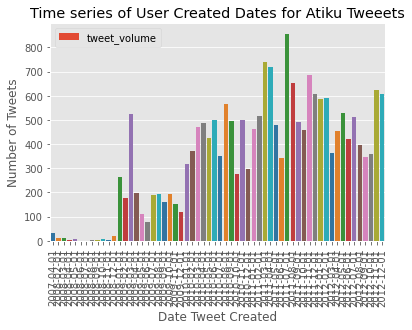

In [ ]:
userA.plot.bar(x='usercreatedA', y="tweet_volume", rot=90, title="Time series of User Created Dates for Atiku Tweeets")


#Using Seaborn
axA=sns.barplot(x='usercreatedA', y='tweet_volume', data=userA, palette='tab10')

plt.xlabel('Date Tweet Created')
plt.ylabel('Number of Tweets')
plt.show(block=True)

USER CREATED DATES FOR TINUBU TWEETS

In [ ]:
#PLOT NUMBER OF TWEET AGAINST USER CREATED DATE
usercreatedT = df_Tinubu['user_created_at'].dropna()

In [ ]:
df_Tinubu['usercreatedT'] = pd.to_datetime(df_Tinubu['user_created_at']).dt.date

userT=df_Tinubu.groupby('usercreatedT').size().reset_index(name='tweet_volume')

userT.head(15)
userT=userT.iloc[:60,::]
userT

,usercreatedT,tweet_volume
0,2006-12-25,4
1,2007-04-22,4
2,2007-06-02,1
3,2007-07-04,3
4,2007-10-13,1
5,2007-11-04,23
6,2007-11-18,3
7,2007-12-16,1
8,2008-02-07,1
9,2008-02-14,4


In [ ]:
userT.plot.bar(x='usercreatedT', y="tweet_volume", rot=90, title="Time series of User Created Dates for Tinubu Tweeets")


#Using Seaborn
axT=sns.barplot(x='usercreatedT', y='tweet_volume', data=userT, palette='rocket_r')

plt.xlabel('Date Tweet Created')
plt.ylabel('Number of Tweets')
plt.show(block=True)

#TWEET DEVICES FOR EACH CANDIDATE TWEETS

In [ ]:
#TWEET DEVICES FOR PETER OBI TWEETS

# Prepare Data
def fill_column(x):
    if x == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        return 'Iphone'
    elif x== '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>':
        return 'Andrioid'
    elif x == '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>':
        return 'Web'
    else:
        return 'Others'


In [ ]:
devices = df_Peter['source_device'].dropna()

In [ ]:
#PLOT DEVICES

df_Peter['source_device'] = devices.apply(fill_column)
dfdevice = df_Peter.groupby('source_device').size().reset_index(name='counts')
n = dfdevice['source_device'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)



In [ ]:
dev=df_Peter.groupby(df_Peter['source_device']).size().reset_index(name='tweet_count')

dev.head(15)
dev=dev.iloc[:60,::]
dev

,source_device,tweet_count
0,Andrioid,185030
1,Iphone,64267
2,Others,1288
3,Web,17553


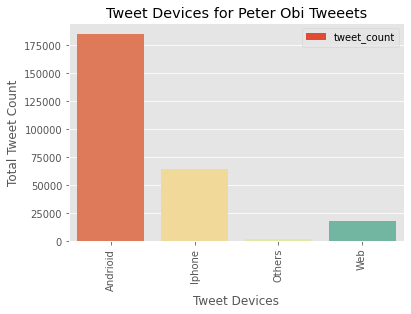

In [ ]:
dev.plot.bar(x='source_device', y="tweet_count", rot=90, title="Tweet Devices for Peter Obi Tweeets")


#Using Seaborn
axDP=sns.barplot(x='source_device', y='tweet_count', data=dev, palette='Spectral')

plt.xlabel('Tweet Devices')
plt.ylabel('Total Tweet Count')
plt.show(block=True)

[Text(0.5, 1.0, 'Tweet Devices for Peter Obi Tweeets')]

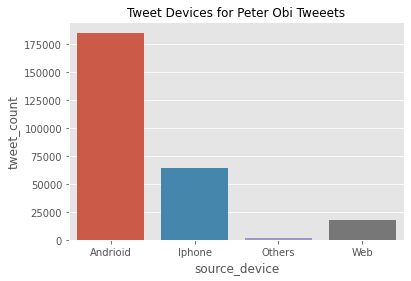

In [ ]:
p=sns.barplot(x='source_device', y='tweet_count', data=dev, ci=None,)
sns.set(rc = {'figure.figsize':(15,6)})

p.set(title="Tweet Devices for Peter Obi Tweeets")

[Text(0.5, 1.0, 'Tweet Devices for Peter Obi Tweeets')]

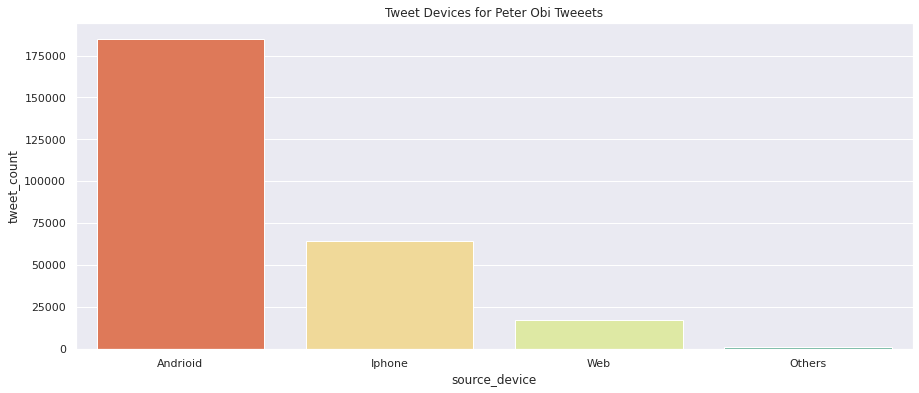

In [ ]:
pdev=sns.barplot(x='source_device', y='tweet_count', palette='Spectral', data=dev, ci=None,order=dev.sort_values('tweet_count', ascending=False).source_device)
sns.set(rc = {'figure.figsize':(15,6)})
pdev.set(title="Tweet Devices for Peter Obi Tweeets")

In [ ]:
#PIECHART
devType=dev['source_device']
Total=dev['tweet_count']
explode=[0.1,0.1,0.1,0.1]
colorsP = ['lightcoral', 'lightblue', 'lightgreen', 'yellow']

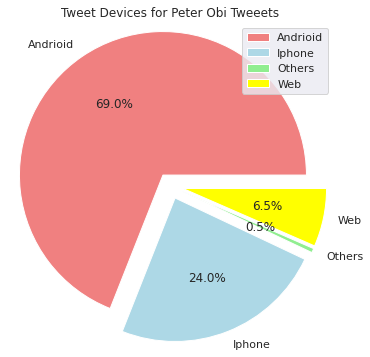

In [ ]:
plt.pie(Total, labels = devType,radius=1.1, colors=colorsP, autopct='%2.1f%%', explode=explode)
plt.title('Tweet Devices for Peter Obi Tweeets')
plt.legend(devType)
plt.show()

TWEET DEVICES FOR ATIKU TWEETS

In [ ]:
devicesA = df_Atiku['source_device'].dropna()

In [ ]:
#PLOT DEVICES

df_Atiku['source_device'] = devicesA.apply(fill_column)
dfdeviceA = df_Atiku.groupby('source_device').size().reset_index(name='counts')
n = dfdeviceA['source_device'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

In [ ]:
devA=df_Atiku.groupby(df_Peter['source_device']).size().reset_index(name='tweet_count')

devA.head(15)
devA=devA.iloc[:60,::]
devA

,source_device,tweet_count
0,Andrioid,153829
1,Iphone,52950
2,Others,980
3,Web,14729


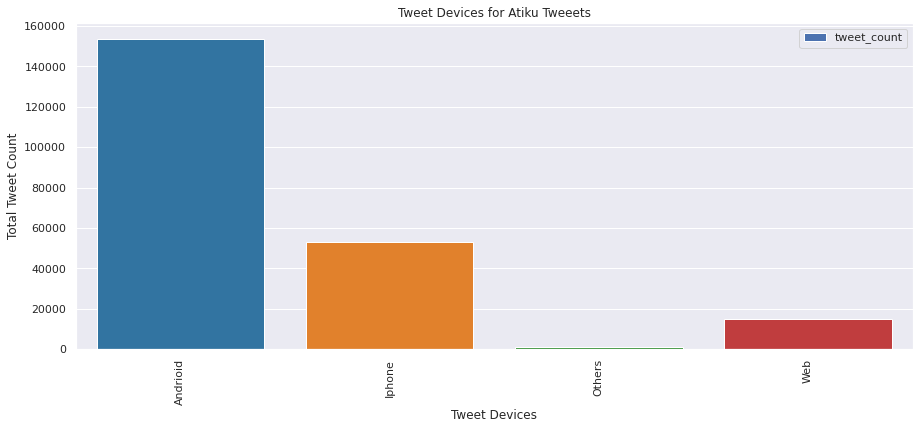

In [ ]:
#BAR CHART
devA.plot.bar(x='source_device', y="tweet_count", rot=90, title="Tweet Devices for Atiku Tweeets")


#Using Seaborn
axDA=sns.barplot(x='source_device', y='tweet_count', data=devA, palette='tab10')

plt.xlabel('Tweet Devices')
plt.ylabel('Total Tweet Count')
plt.show(block=True)

[Text(0.5, 1.0, 'Tweet Devices for Atiku Tweeets')]

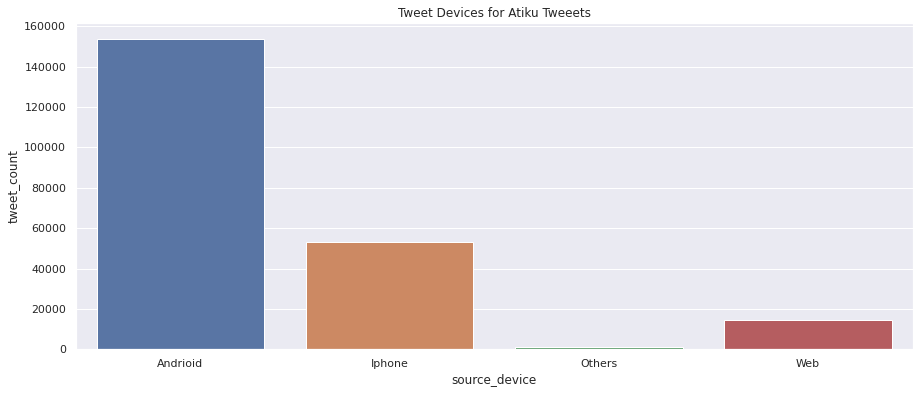

In [ ]:
pA=sns.barplot(x='source_device', y='tweet_count', data=devA, ci=None,)
sns.set(rc = {'figure.figsize':(10,6)})

pA.set(title="Tweet Devices for Atiku Tweeets")

In [ ]:
#PIECHART
devTypeA=devA['source_device']
TotalA=devA['tweet_count']
explode=[0.1,0.1,0.1,0.1]


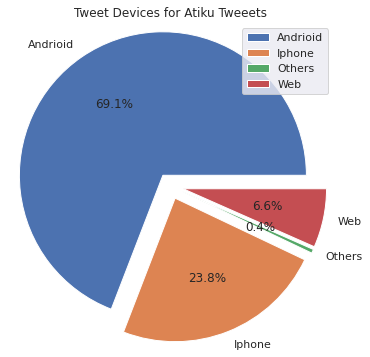

In [ ]:
plt.pie(TotalA, labels = devTypeA, radius=1.1, autopct='%2.1f%%', explode=explode)
plt.title('Tweet Devices for Atiku Tweeets')
plt.legend(devTypeA)
plt.show()

TWEET DEVICES FOR TINUBU TWEETS

In [ ]:
devicesT = df_Tinubu['source_device'].dropna()

In [ ]:
#PLOT DEVICES

df_Tinubu['source_device'] = devicesT.apply(fill_column)
dfdeviceP = df_Tinubu.groupby('source_device').size().reset_index(name='counts')
nT = dfdeviceP['source_device'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=nT)

In [ ]:
devT=df_Tinubu.groupby(df_Tinubu['source_device']).size().reset_index(name='tweet_count')

devT.head(10)
devT=devT.iloc[:60,::]
devT

,source_device,tweet_count
0,Andrioid,136117
1,Iphone,56034
2,Others,2280
3,Web,12893


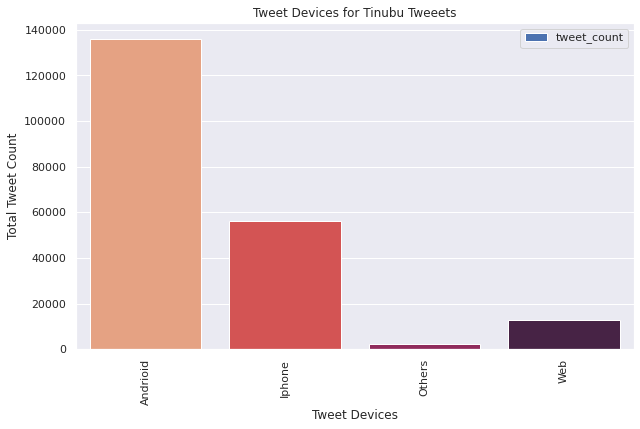

In [ ]:
#BAR CHART
devT.plot.bar(x='source_device', y="tweet_count", rot=90, title="Tweet Devices for Tinubu Tweeets")


#Using Seaborn
axDT=sns.barplot(x='source_device', y='tweet_count', data=devT, palette='rocket_r')

plt.xlabel('Tweet Devices')
plt.ylabel('Total Tweet Count')
plt.show(block=True)

In [ ]:
#PIECHART
devTypeT=devT['source_device']
TotalT=devT['tweet_count']
explode=[0.1,0.1,0.1,0.1]
colorsA = ['yellow', 'lightblue', 'lightgreen','lightcoral']

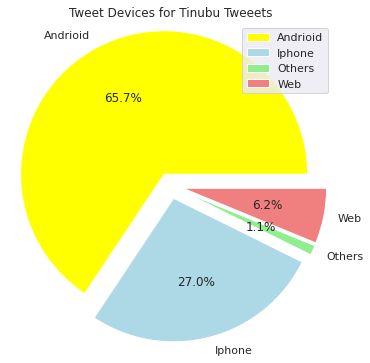

In [ ]:
plt.pie(TotalT, labels = devTypeT,colors=colorsA, radius=1.1, autopct='%2.1f%%', explode=explode)
plt.title('Tweet Devices for Tinubu Tweeets')
plt.legend(devTypeT)
plt.show()

#VERIFIED DEVICES FOR ATIKU TWEETS

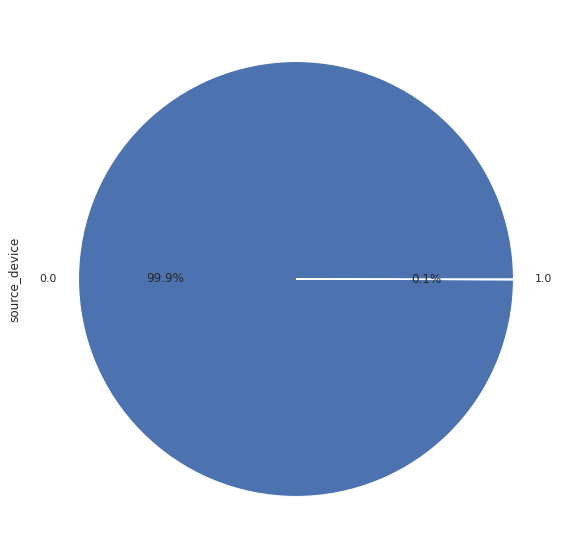

In [ ]:
#PLOTTING VERIFIED AND UNVERIFIED USERS
df_Peter.groupby(['user_verified'])['source_device'].count().plot.pie(figsize=(10,10),autopct='%1.1f%%')


In [ ]:
vef=df_Peter.groupby(df_Peter['user_verified']).size().reset_index(name='tweet_count')

In [ ]:
vefType=vef['user_verified']
Totalvef=vef['tweet_count']
explode=[0,0,0,0.1,0]

In [ ]:
vef.head(15)
vef=vef.iloc[:60,::]
vef

,user_verified,tweet_count
0,0.0,267962
1,1.0,176


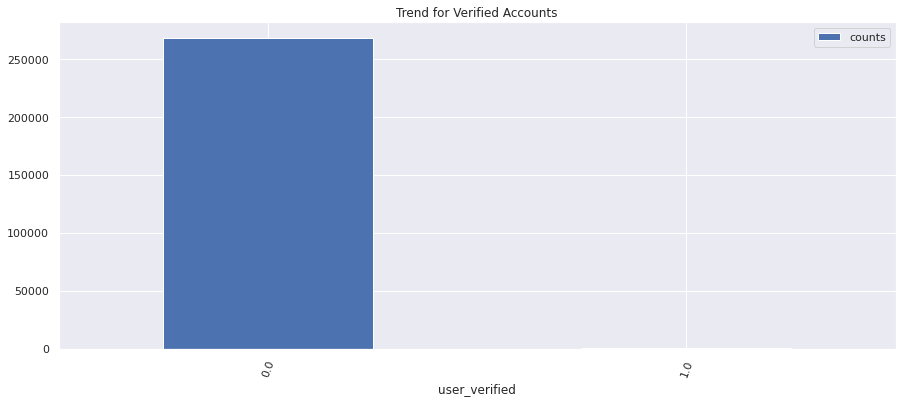

In [ ]:
# Verified Source  : Histogram
VerifiedSource = df_Peter['user_verified'].groupby(df_Peter['user_verified']).size().reset_index(name='counts')
VerifiedSource.plot.bar(x="user_verified", y="counts", rot=70, title="Trend for Verified Accounts");


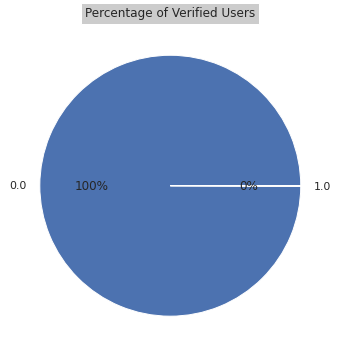

In [ ]:
#Tweet Source PieChart
y = VerifiedSource["user_verified"]
x = VerifiedSource["counts"]
#z = df2['DateCreated']
plt.pie(x, labels = y, autopct='%1.0f%%')
#plt.legend()
#myexplode = [0.2,0.1,0.1,0.1,0.,0.1,0.1,0.1,0.2,0.2]
plt.title("Percentage of Verified Users", bbox={'facecolor':'0.8', 'pad':4})
plt.show()



#EXPLORATORY DATA ANALYSIS FOR COMBINED ELECTION DATASET